<a href="https://colab.research.google.com/github/KhaSab5292/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [22]:
# importing pandas library and reverting it to version 23.4
import pandas as pd
pd.__version__
!pip install pandas==0.23.4

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
peopledata = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

print(peopledata.shape)
print(peopledata.dtypes)
print(peopledata.head())
peopledata.describe()

(1200, 4)
Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object
   Unnamed: 0  age  weight  exercise_time
0           0   44     118            192
1           1   41     161             35
2           2   46     128            220
3           3   39     216             57
4           4   28     116            182


,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [26]:
age_bins = pd.cut(peopledata['age'], 5)  
weight_bins = pd.cut(peopledata['weight'], 5)
time_bins = pd.cut(peopledata['exercise_time'], 5)

#comparing age to weight
pd.crosstab(weight_bins, age_bins)

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
weight,,,,,
"(99.854, 129.2]",80,104,78,53,60
"(129.2, 158.4]",86,62,62,71,54
"(158.4, 187.6]",49,49,49,45,66
"(187.6, 216.8]",34,31,26,44,44
"(216.8, 246.0]",7,7,8,9,22


In [30]:
# percentages
pd.crosstab(weight_bins, age_bins, normalize = 'columns')

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
weight,,,,,
"(99.854, 129.2]",0.312500,0.411067,0.349776,0.238739,0.243902
"(129.2, 158.4]",0.335938,0.245059,0.278027,0.319820,0.219512
"(158.4, 187.6]",0.191406,0.193676,0.219731,0.202703,0.268293
"(187.6, 216.8]",0.132812,0.122530,0.116592,0.198198,0.178862
"(216.8, 246.0]",0.027344,0.027668,0.035874,0.040541,0.089431


In [31]:
#comparing exercise time to weight
pd.crosstab(weight_bins, time_bins, normalize = 'columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 129.2]",0.190647,0.205696,0.318386,0.411458,0.560209
"(129.2, 158.4]",0.158273,0.240506,0.300448,0.385417,0.387435
"(158.4, 187.6]",0.219424,0.294304,0.251121,0.197917,0.052356
"(187.6, 216.8]",0.273381,0.231013,0.130045,0.005208,0.000000
"(216.8, 246.0]",0.158273,0.028481,0.000000,0.000000,0.000000


In [35]:
#all three variables
pd.crosstab(weight_bins, [age_bins, time_bins], normalize = 'columns')

age             (17.938, 30.4]      ...         (67.6, 80.0]
exercise_time     (-0.3, 60.0]      ...       (180.0, 240.0]
weight                              ...                     
(99.854, 129.2]       0.192308      ...             0.555556
(129.2, 158.4]        0.134615      ...             0.444444
(158.4, 187.6]        0.211538      ...             0.000000
(187.6, 216.8]        0.326923      ...             0.000000
(216.8, 246.0]        0.134615      ...             0.000000

[5 rows x 24 columns]

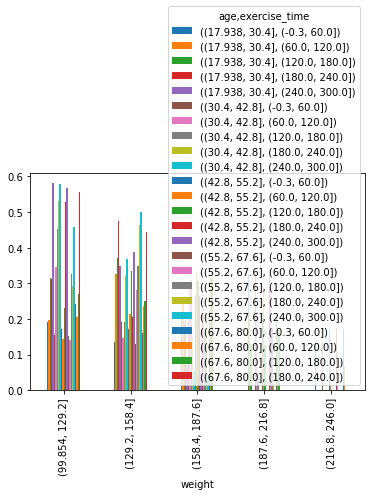

In [37]:
data_crosstab = pd.crosstab(weight_bins, [age_bins, time_bins], normalize = 'columns')
data_crosstab.plot(kind = 'bar')

In [0]:
pd.crosstab(weight_bins, [age_bins, time_bins], normalize = 'columns')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

    They are all integers.

2.  What are the relationships between the variables?

    The more people excersise, the less they will weight for certain age groups.
    The people who weigh the most hardly excercise at all. 

3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)